# 1 Transforming Data (5 pts)
The ratings.csv file contains user ratings, one movie per line. See the README file for
more information.
Transform the data into a user-movie ratings matrix. There should be 610 rows (one
for each user) and 9,742 columns (one for each movie). Each cell should contain the users
rating for that movie. Note that not every user has rated every movie. Assign a value of
0 for any missing values.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd


In [2]:
RATINGS_FILE_NAME = "ratings.csv"
MOVIES_FILE_NAME = "movies.csv"
ratings_df = pd.read_csv(RATINGS_FILE_NAME)
movies_df = pd.read_csv(MOVIES_FILE_NAME)

#Checked
userid_unique = ratings_df["userId"].unique().tolist()
movieid_unique = movies_df["movieId"].unique().tolist()
# print(len(userid_unique))
# print(len(movieid_unique))

new_df = pd.DataFrame(0, columns=movieid_unique, index=userid_unique)
for i in range(len(ratings_df)):
    new_df.loc[ratings_df.loc[i, "userId"],ratings_df.loc[i, "movieId"]] = ratings_df.loc[i, "rating"]

print(new_df)

new_df.to_csv("userXmovie.csv")


     1       2       3       4       5       6       7       8       9       \
1       4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
606     2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0     0.0   
607     4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608     2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0     0.0   
609     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610     5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0     0.0   

     10      ...  193565  193567  193571  193573  1

## REPORT OF NUMBER 1:

In ratings.csv, not all data of movie are presented(9724 of 9742 are picked)
So, I got data from movies.csv, so as to make columns in it.



***

# 2 Principle Component Analysis (15 pts)

Apply PCA to the reduce the dimensionality of the movies.
(a) Transpose the matrix from Q1 so that rows refer to movies and columns refer to users.
Mean center the data. Note that you will only use this transformed, mean-centered
data for this question.
(b) Apply PCA with number of components k = 2 to reduce the dimensionality of the
movies.
(c) Plot the results and color each movies by its genre. Genres for each movie are listed
in movies.csv. Since each movie may have more than one genre, to simplify just use
the first genre in the list. Discuss what patterns you see in the visualization.
(d) Determine the “intrinsic” dimensionality of the movies, by finding the number of principle components that are needed to explain 80% of the variance of the data. Discuss
how this compares to k = 2 and how this may impact the quality of the visualization
above.

==== (a) Transpose the matrix from Q1 and mean centered ====
             0         1         2         3         4         5       6    \
1       3.896017 -0.011753 -0.009752 -0.078834  3.983576 -0.112605  4.4496   
2      -0.103983 -0.011753 -0.009752 -0.078834 -0.016424  3.887395 -0.0504   
3       3.896017 -0.011753 -0.009752 -0.078834 -0.016424  4.887395 -0.0504   
4      -0.103983 -0.011753 -0.009752 -0.078834 -0.016424  2.887395 -0.0504   
5      -0.103983 -0.011753 -0.009752 -0.078834 -0.016424  4.887395 -0.0504   
...          ...       ...       ...       ...       ...       ...     ...   
193581 -0.103983 -0.011753 -0.009752 -0.078834 -0.016424 -0.112605 -0.0504   
193583 -0.103983 -0.011753 -0.009752 -0.078834 -0.016424 -0.112605 -0.0504   
193585 -0.103983 -0.011753 -0.009752 -0.078834 -0.016424 -0.112605 -0.0504   
193587 -0.103983 -0.011753 -0.009752 -0.078834 -0.016424 -0.112605 -0.0504   
193609 -0.103983 -0.011753 -0.009752 -0.078834 -0.016424 -0.112605 -0.0504   

  

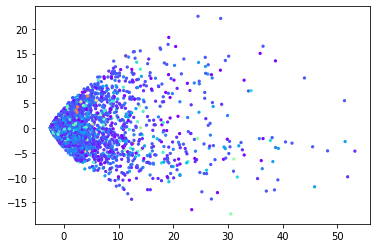


== (d) Determine the “intrinsic” dimensionality of the movies ==
[k = 153] sum of variance:  0.7987022226435222
[k = 154] sum of variance:  0.8001902509033136



In [3]:
RATINGS_FILE_NAME = "ratings.csv"
MOVIES_FILE_NAME = "movies.csv"
Q1_PROCESSED = "userXmovie.csv"
ratings_df = pd.read_csv(RATINGS_FILE_NAME)
movies_df = pd.read_csv(MOVIES_FILE_NAME)
user_rating_df = pd.read_csv(Q1_PROCESSED)

def transpose_dataframe(df):
    df = df.transpose()
    df = df.drop(["Unnamed: 0"])
    return df

# Making Mean centered data
def mean_centered(df):
    return df-df.mean()

def check_mean_centered(df):
    print(df.sum().sum())

def make_PCA(df, k):
    principal = PCA(n_components=k)
    principal_components = principal.fit_transform(df)
    principaldf = pd.DataFrame(data=principal_components, columns=["component1", "component2"])
    principaldf.insert(0, "movieId", df.index, True)
    principaldf["movieId"] = pd.to_numeric(principaldf["movieId"])

    return principaldf

def merge_movie(df1, df2):
    target_df = pd.merge(df1, df2, left_on="movieId", right_on="movieId", how='inner')
    target_df = target_df.sort_values("movieId")

    return target_df

def postprocess(df):
    df["genres"] = df["genres"].str.split("|").str[0]
    genre = df["genres"].tolist()
    unique_genre = df["genres"].unique().tolist()
    genre_dict = {string: i for i, string in enumerate(unique_genre)}
    genre_id = []
    for i in range(len(genre)):
        genre_id.append(genre_dict[genre[i]])

    return df, genre_id

def visualize(merged_df, genre_id):
    plt.scatter(merged_df["component1"].tolist(), merged_df["component2"].tolist(), c=genre_id, cmap=plt.cm.rainbow, s=5)
    plt.show()

def PCA_variance_for_d(df, k):
    pca = PCA(k)
    pca.fit(df)
    return (pca.explained_variance_ratio_.sum())


# =========== (a) Transpose the matrix from Q1 =========== #
# Transpose the matrix from Q1
df              = transpose_dataframe(user_rating_df)
# Mean center the data.
df              = mean_centered(df)
print ("==== (a) Transpose the matrix from Q1 and mean centered ====")
print(df)
print ("============================================================\n")


# =========== (b) Apply PCA with number of components k = 2 =========== #
principaldf     = make_PCA(df, 2)
print ("======= (b) Apply PCA with number of components k = 2 =======")
print(principaldf)
print ("=============================================================\n")


# ======= (c) Plot the results and color each movies by its genre ======= #
merged_df       = merge_movie(principaldf, movies_df)
merged_df, genre_id = postprocess(merged_df)
print ("=== (c) Plot the results and color each movies by its genre ===")
visualize(merged_df, genre_id)
print ("===============================================================\n")


# ====== (d) Determine the “intrinsic” dimensionality of the movies ====== #
print ("== (d) Determine the “intrinsic” dimensionality of the movies ==")
EXPLAIN_80 = 154
print("[k = 153] sum of variance: ", PCA_variance_for_d(df, EXPLAIN_80 - 1))
print("[k = 154] sum of variance: ", PCA_variance_for_d(df, EXPLAIN_80))
print ("================================================================\n")

## REPORT OF NUMBER 2

(c) via scatteded plot, we could see that there's relationship by two component, looking as fish shape.

(d) It could not make 80% of variance, but PCA dimension over 2 is lossful, so that 2 is best for result.

***

# 3 Clustering (15 pts)
Apply k-means clustering to the data from Q1 (rows=users, columns=movies, no meancentering) and cluster the users.
(a) For values of k = [2, 4, 8, 16, 32], apply k-means and measure the inertia for each
value of k. Plot the resulting inertia scores for each choice of k.
(b) From the above results, choose an appropriate value of k from the plot and support
your choice.
(c) Cluster the data again with your chosen value of k. For each of the resulting clusters,
find the top three movies that are highest rated (on average) by the users in the cluster.
Report the movie titles and discuss whether the results seem reasonable (i.e., do the
top-rated movies in each cluster seem to correspond to recognizable groups).

==== (a) apply k-means and measure the inertia and plot ====
[1094681.3969594603, 1036424.5633047103, 969328.9643269818, 891706.6152008187, 780329.5184302119]


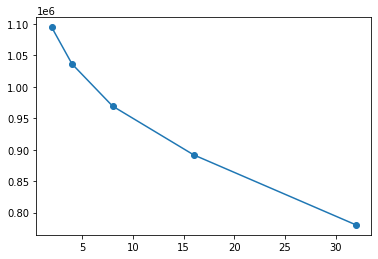


==== (c) find the top three movies that are highest rated ====
Top3 for cluster 0 : Index(['260', '1196', '2571'], dtype='object')
Top3 for cluster 1 : Index(['318', '356', '296'], dtype='object')
Top3 for cluster 2 : Index(['2571', '1196', '356'], dtype='object')
Top3 for cluster 3 : Index(['4973', '2395', '260'], dtype='object')



In [4]:
def kmean(n_cluster, df):
    model = KMeans(n_clusters=n_cluster, algorithm="auto")
    model.fit(df)
    df_labeled = df.copy()
    df_labeled["predict"] = model.predict(df)
    return df_labeled, model.inertia_

def top10(df_target):
    df_target.loc[-1] = df_target.mean(0)
    df_target.index = df_target.index + 1  # shifting index
    df_target = df_target.sort_index()
    idx = df_target.columns.tolist()
    key = df_target.loc[0].tolist()
    top10list= np.array(key).argsort()[-10:][::-1]
    for i in top10list:
        if idx[i] not in ["318", "356", "296", "593", "2571", "260"]:
            print(idx[i], end="\t")
    print("")

def top3(df_target):
    MOVIES_FILE_NAME = "movies.csv"
    movies = pd.read_csv(MOVIES_FILE_NAME)
    movies_title = movies[['movieId', 'title']]
    movie_rate_mean = pd.DataFrame(df_target.mean())
    top3_list_idx = movie_rate_mean[0].to_numpy().argsort()[-3:][::-1]
    top3_list = movie_rate_mean.index[top3_list_idx]
    # top3_movie = []
    # for i in top3_list:
        # print(movies_title[movies_title['movieId'] == i]['title'])
        # top3_movie.append(movies_title[movies_title['movieId'] == i]['title'].astype(str))
    return top3_list



filename = "userXmovie.csv"
df = pd.read_csv(filename)
df = df.drop(["Unnamed: 0"], axis=1)

# =========== (a) apply k-means and measure the inertia and plot =========== #
# apply k-means and measure the inertia
labels = [2, 4, 8, 16, 32]
inertias=[]

for i in labels:
    _, inertia = kmean(i, df)
    inertias.append(inertia)

print ("==== (a) apply k-means and measure the inertia and plot ====")
print(inertias)
# Plot the resulting inertia scores for each choice of k
plt.plot(labels, inertias, '-o')
plt.show()
print ("============================================================\n")



# ========= (c) Cluster the data again with your chosen value of k ========= #
k = 4
top_movies = []
df_labeled, _ = kmean(k, df)

# find top 3 movies for each cluster
for i in range(k):
    idx_clustered_user_movie_df = df_labeled['predict'] == i
    clustered_user_movie_df = df_labeled[idx_clustered_user_movie_df]
    clustered_user_movie_df = clustered_user_movie_df.drop(['predict'],axis=1)
    top_movies.append(top3(clustered_user_movie_df))

# print top 3 movies for each cluster
print ("==== (c) find the top three movies that are highest rated ====")
for i in range(k):
    top_movies[i]
    print("Top3 for cluster", i, ":", top_movies[i])
print ("==============================================================\n")

## Report 3
(b) I choosed k as 4. We could easily figure that graph falls rapidly when clusters are in 2 and 4.

(c)
* Top3 for cluster 0
  * 296 - Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
  * 1196 - Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Sci-Fi
  * 260 - Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
* Top3 for cluster 1
  * 1196 - Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|
  * 260 - Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
  * 356 - Forrest Gump (1994),Comedy|Drama|Romance|War
* Top3 for cluster 2
  * 318 - "Shawshank Redemption, The (1994)",Crime|Drama
  * 356 - Forrest Gump (1994),Comedy|Drama|Romance|War
  * 296 - Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
* Top3 for cluster 3
  * 2571 - "Matrix, The (1999)",Action|Sci-Fi|Thriller
  * 58559 - "Dark Knight, The (2008)",Action|Crime|Drama|IMAX
  * 2959 - Fight Club (1999),Action|Crime|Drama|Thriller

    We could see that these clusters are highly related to genres.
    For cluster 0, this is related to Star Wars, that as it is famous movie, lots of people saw and rated the movie, that
    it could sufficiently cluster enough.

    For cluster 1 this also affected star wars with forrest gump. It does not seems related, but as it is famous enough
    for users to watch without caring genre, this cluster could be seen as "famous movie"

    For cluster 2, this cluster seems related to drama, but due to popularity of star wars,  we could not see
    "obvious" relationship in this cluster.

    For cluster3, we could highly inference that this movies are related to action, crime, thriller.



***

# 4 Singular Value Decomposition (15 pts)
Apply SVD to the user-movie matrix from Q1 (rows=users, columns=movies, no meancentering).
(a) Apply SVD with number of components k = 32. Plot the resulting singular values.
(b) For each of the values of k = [2, 4, 8, 16, 32] considered above, report the sum of the
explained variance ratio. Discuss how the results compare to the inertia values
above and whether it supports your choice of k.
(c) Apply SVD with k = 2 and transform the data.
(d) Plot the results (for k = 2) and color the users by the cluster memberships you found
above. Discuss any patterns you can see and compare them to the previous analysis
(either from clustering or PCA).

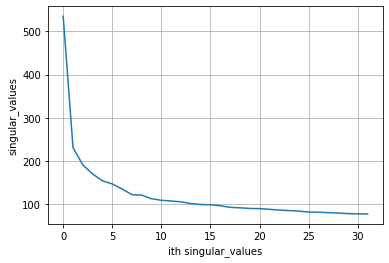

====== (b) sum of explained_variance_ratio ======
[ K = 2 ]	 0.17282703639280567
[ K = 4 ]	 0.2218694528523222
[ K = 8 ]	 0.28703149016098894
[ K = 16 ]	 0.36340719073408234
[ K = 32 ]	 0.46080978488730046

====== (c) transformed data using svd, k=2 ======
[[ 29.68924387 -14.26169352]
 [  3.13506484   4.10122227]
 [  0.72319333  -0.47825229]
 ...
 [ 62.05385851  -2.73797571]
 [  4.05060108  -3.18757379]
 [ 74.21215636  46.75826243]]


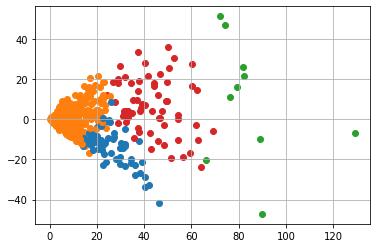

In [5]:
USER_MOVIE_FILE_NAME = "userXmovie.csv"
df = pd.read_csv(USER_MOVIE_FILE_NAME)
df = df.drop(["Unnamed: 0"], axis=1)


#axis =========== (a) Apply SVD, Plot the resulting singular_values =========== #
# calculated truncated SVD for top k sigular values
k = 32
svd_32 = TruncatedSVD(n_components=k)
svd_32.fit(df)

#  Plot the resulting singular_values
plt.plot(svd_32.singular_values_)
plt.xlabel('ith singular_values')
plt.ylabel('singular_values')
plt.grid()
plt.show()




# =========== (b) report the sum of the explained_variance_ratio
#                                       for k = [2, 4, 8, 16, 32] =========== #
k = [2, 4, 8, 16, 32]
print ("====== (b) sum of explained_variance_ratio ======")
# calculated sum of each explained_variance_ratio using truncated SVD for k
for i in k:
    svd = TruncatedSVD(i)
    svd.fit(df)
    print("[ K =", i, "]\t", svd.explained_variance_ratio_.sum())
print ("=================================================\n")




# =========== (c) Apply SVD with k = 2 and transform the data =========== #
# Apply SVD with k = 2
k = 2
svd_2 = TruncatedSVD(n_components=k)
svd_2.fit(df)

# transform the data
svd_2_transformed = svd_2.fit_transform(df)

print ("====== (c) transformed data using svd, k=2 ======")
print(svd_2_transformed)
print ("=================================================")




# =========== (d) Plot the results, and color the users =========== #
# find cluster memberships I found above (# of Cluster = 8)
N_CLUSTER = 4
model = KMeans(n_clusters=N_CLUSTER, algorithm="auto")
model.fit(df)
person_cluster_info = model.predict(df)

# Plot the results (for k = 2) and color the users
COLOR_BY_CLUSTER = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for i in range(len(svd_2_transformed)):
    plt.scatter(svd_2_transformed[i][0], svd_2_transformed[i][1],
                color=COLOR_BY_CLUSTER[person_cluster_info[i]])
plt.grid()
plt.show()

## Report 4

### (b) For each of the values of k = [2, 4, 8, 16, 32] considered above, report the sum of the explained variance ratio. Discuss how the results compare to the inertia values above and whether it supports your choice of k.

```
====== (b) sum of explained_variance_ratio ======
[ K = 2 ]	 0.17282702438349054
[ K = 4 ]	 0.22186824581131534
[ K = 8 ]	 0.28702798645410343
[ K = 16 ]	 0.3634235239007264
[ K = 32 ]	 0.46095909742196944
=================================================
```
As the singular vectors(number of components) that describing the data increases, the sum of the explained variance ratio increases.
I choose K = 4 for inertia, and it gives me 1039770.464220447 as inertia values.

```
  K     explained_variance_ratio      inertia
[ 2 ]     0.17282702438349054    1094664.3508473537
[ 4 ]     0.22186824581131534    1039770.464220447
[ 8 ]     0.28702798645410343    977170.0278454439
[ 16 ]    0.3634235239007264     898340.9759445542
[ 32 ]    0.46095909742196944    781701.5789231444
```

As shown in the table above, inertia value decreases as K increases, and explained_variance_ratio increases as K increases. It means we can explain the data in more detail if we has the greater K.

As k increases the inertia score does not change much, thus will pick k=n. The slope of explained_variance_ratio & K from 2 to 4 and 4 to 8 is the largest, so explained_variance_ratio also supports choosing K.


<br/>

### (d) Plot the results (for k = 2) and color the users by the cluster memberships you found above. Discuss any patterns you can see and compare them to the previous analysis (either from clustering or PCA).

: I choose # of cluster as 4, and data is clustered with y = x-20 and y = -x + 20 based on about (x, y) = (20, 0).

We could see that by SVD, sample space could be separated into 4 clusters.

By question 3, we could see that sample space could be clustered into 4 parts, which seems related to genres.

So we could highly infer that this clustered sample space are related to genres of movies.



